In [137]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
Config = {
    'sboost' : [0, 1e4, 1e6, 1e8], 
    'boosters' : ['no-boost', 'stiffboosting 1e4', 'stiffboosting 1e6', 'stiffboosting 1e8'],
    'ansatz' : 'MA-PIA', 
    'stepsize' : 0.25, 
    'shots' : 1000
}

data = dict()

source = 'data/benchmark/Sboost_{sboost}_ansatz_{ansatz}_stepsize_{stepsize}_shots_{shots}.csv'

for i in range (len(Config['boosters'])): 
    try:
        dataset = pd.read_csv(source.format(sboost = Config['sboost'][i], ansatz = Config['ansatz'], stepsize = Config['stepsize'], shots = Config['shots']))
        data[Config['boosters'][i]] = dataset
    except:
        print(f'no dataset for {source.format(sboost = Config['sboost'][i], ansatz = Config['ansatz'], stepsize = Config['stepsize'], shots = Config['shots'])}')
display(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id (int)                  601 non-null    int64  
 1   Valid (int)               601 non-null    int64  
 2   Updated (str)             601 non-null    object 
 3   Matrix (mat)              601 non-null    object 
 4   Size (int)                601 non-null    int64  
 5   Type (str)                601 non-null    object 
 6   Rank (int)                601 non-null    int64  
 7   Density (flt)             601 non-null    float64
 8   Stiffness (flt)           601 non-null    float64
 9   Penalty (flt)             601 non-null    float64
 10  Sboost (flt)              601 non-null    float64
 11  Test_solver (str)         601 non-null    object 
 12  Test (flt)                601 non-null    float64
 13  Test_state (vec)          601 non-null    object 
 14  Test_itera

None

In [138]:

success_rates = dict()
average_iterations = dict()
approximation_ratios = dict()


success_rates_errs = dict()
average_iterations_errs = dict()
approximation_ratios_errs = dict()

iterations = dict()

for booster in Config['boosters']: 
    #print(booster)
    success_rates[booster] = 0
    average_iterations[booster] = 0 
    approximation_ratios[booster] = 0 
    iterations[booster] = []
    booster_data = data[booster]
    
    iterations[booster] = booster_data[(booster_data['Train_iterations_1 (int)'] < 100) & (booster_data['Train_iterations_1 (int)'] > 0)]['Train_iterations_1 (int)']
    average_iterations[booster] = np.mean(booster_data[(booster_data['Train_iterations_1 (int)'] < 50) & (booster_data['Train_iterations_1 (int)'] > 0)]['Train_iterations_1 (int)'])
    
    print(len(booster_data[(booster_data['Train_iterations (int)'] < 102) & (booster_data['Train_iterations (int)'] > 0)]['Train_iterations (int)']))
    approximation_ratios[booster] = np.mean(np.abs((booster_data['Train (flt)'] - booster_data['Test (flt)']) / booster_data['Test (flt)']))
    success_rates[booster] = len(booster_data[booster_data['Train_iterations (int)'] < 101]) / len(booster_data)


    average_iterations_errs[booster] = np.std(booster_data['Train_iterations (int)'])
    approximation_ratios_errs[booster] = np.std(np.abs((booster_data['Train (flt)'] - booster_data['Test (flt)']) / booster_data['Test (flt)']))
    
    

600
600
600
600


(1.0, 50.0)

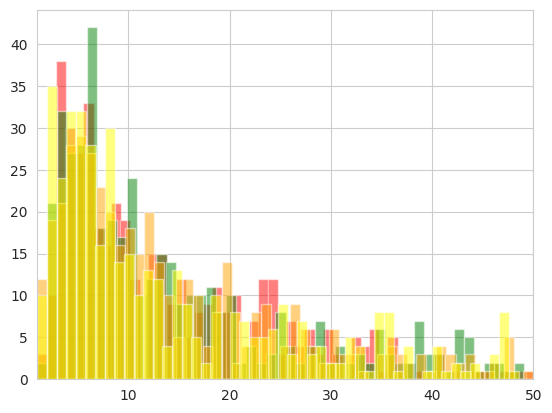

In [108]:
plt.hist(iterations['no-boost'], bins = 100, color = 'red', alpha = 0.5, width = 1,)
plt.hist(iterations['stiffboosting 1e4'], bins = 100, color = 'green', alpha = 0.5, width = 1)
plt.hist(iterations['stiffboosting 1e6'], bins = 100, color = 'orange', alpha = 0.5, width = 1)
plt.hist(iterations['stiffboosting 1e8'], bins = 100, color = 'yellow', alpha = 0.5, width = 1)

plt.xlim(xmin = 1, xmax = 50)
# ax_inset = inset_axes(iterax, 
#                       width="30%",   # ширина 30% от основного графика
#                       height="30%",  # высота 30% от основного графика
#                       loc='upper left')  # расположение в правом верхнем углу

# Рисуем на вставке увеличенную часть данных

# left = 3
# right = 6
# for i in range(len(Config['boosters'])):
    
#     if (Config['boosters'][i] == 'stiffboosting 1e6'):
#         ax_inset.bar(limits[left:right], height = average_iterations[Config['boosters'][i]][left:right], color = colors[i], width = 5-i, label = Config['boosters'][i], alpha = alphas[i], zorder = 5)
    
#     else:
#         ax_inset.bar(limits[left:right], height = average_iterations[Config['boosters'][i]][left:right], color = colors[i], width = 5-i, label = Config['boosters'][i], alpha = alphas[i])

# sublimits = np.arange(15, 40, 5)
# ax_inset.set_ylim(ymin = 8)
# ax_inset.set_title('Увеличенная область')

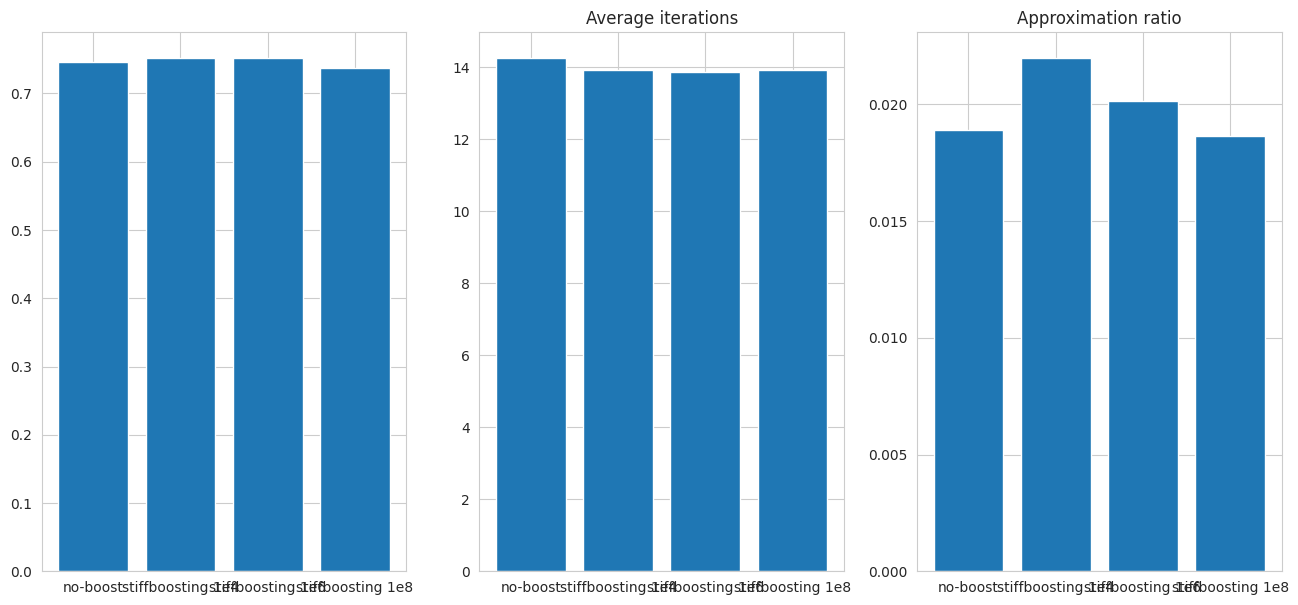

In [139]:
fig = plt.figure(figsize = (16, 7))

sns.set_style('whitegrid')

suc_ax = fig.add_subplot(131)
iter_ax = fig.add_subplot(132)
approx_ax = fig.add_subplot(133)


iter_ax.set_title('Average iterations')
iter_ax.bar(Config['boosters'], height = average_iterations.values())

approx_ax.set_title('Approximation ratio')
approx_ax.bar(Config['boosters'], height = approximation_ratios.values())

suc_ax.bar(Config['boosters'], height = success_rates.values())

plt.show()

In [160]:

success_rates = dict()
average_iterations = dict()
approximation_ratios = dict()


success_rates_errs = dict()
average_iterations_errs = dict()
approximation_ratios_errs = dict()

#limits = [10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100]
limits = np.arange(10, 105, step = 5)
for booster in Config['boosters']: 
    #print(booster)
    success_rates[booster] = []
    average_iterations[booster] = []
    approximation_ratios[booster] = 0
    average_iterations_errs[booster] = []
    booster_data = data[booster]
  

    for limit in limits: 
        average_iterations[booster].append(np.mean(booster_data[(booster_data['Train_iterations (int)'] < limit) & (booster_data['Test (flt)'] == booster_data['Train (flt)'])]['Train_iterations (int)']))
        success_rates[booster].append(len(booster_data[(booster_data['Train_iterations (int)'] < limit) & (booster_data['Train (flt)'] == booster_data['Test (flt)'])]) / len(booster_data))
        #average_iterations_errs[booster].append(np.std(booster_data[(booster_data['Train_iterations (int)'] < limit) & (booster_data['Train_iterations (int)'] > 0)]['Train_iterations (int)']))
        
        #[booster].append((booster_data[(booster_data['Train_iterations (int)'] < limit) & (booster_data['Train_iterations (int)'] > 0)]['Train_iterations (int)']))
        print(len(booster_data[(booster_data['Train_iterations (int)'] < limit) & (booster_data['Train_iterations (int)'] > 0)]['Train_iterations (int)']))
    approximation_ratios[booster] = np.mean(np.abs((booster_data['Train (flt)'] - booster_data['Test (flt)']) / booster_data['Test (flt)']))
    


    # average_iterations_errs[booster] = np.std(booster_data['Train_iterations (int)'])
    # approximation_ratios_errs[booster] = np.std(np.abs((booster_data['Train (flt)'] - booster_data['Test (flt)']) / booster_data['Test (flt)']))
    


188
263
311
334
357
369
392
410
417
422
430
435
437
441
442
442
443
444
447
184
258
296
331
355
366
381
394
402
419
426
428
431
433
441
446
449
449
451
199
252
289
318
345
360
379
388
401
410
417
425
432
437
442
445
447
449
451
181
248
291
341
363
385
395
400
404
410
413
418
423
425
429
433
436
441
441


(4.0, 14.838292682926829)

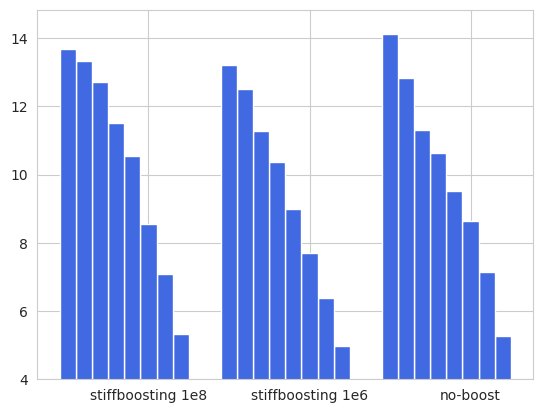

In [12]:

xpos = np.arange(3)

width = 0.1

limits = np.arange(10, 50, 5)

for i in range(len(limits)):

    plt.bar(xpos - i * width, [average_iterations[booster][i] for booster in Config['boosters']], width, color = 'royalblue')

plt.xticks(xpos - 0.2, Config['boosters'])
plt.ylim(ymin = 4)

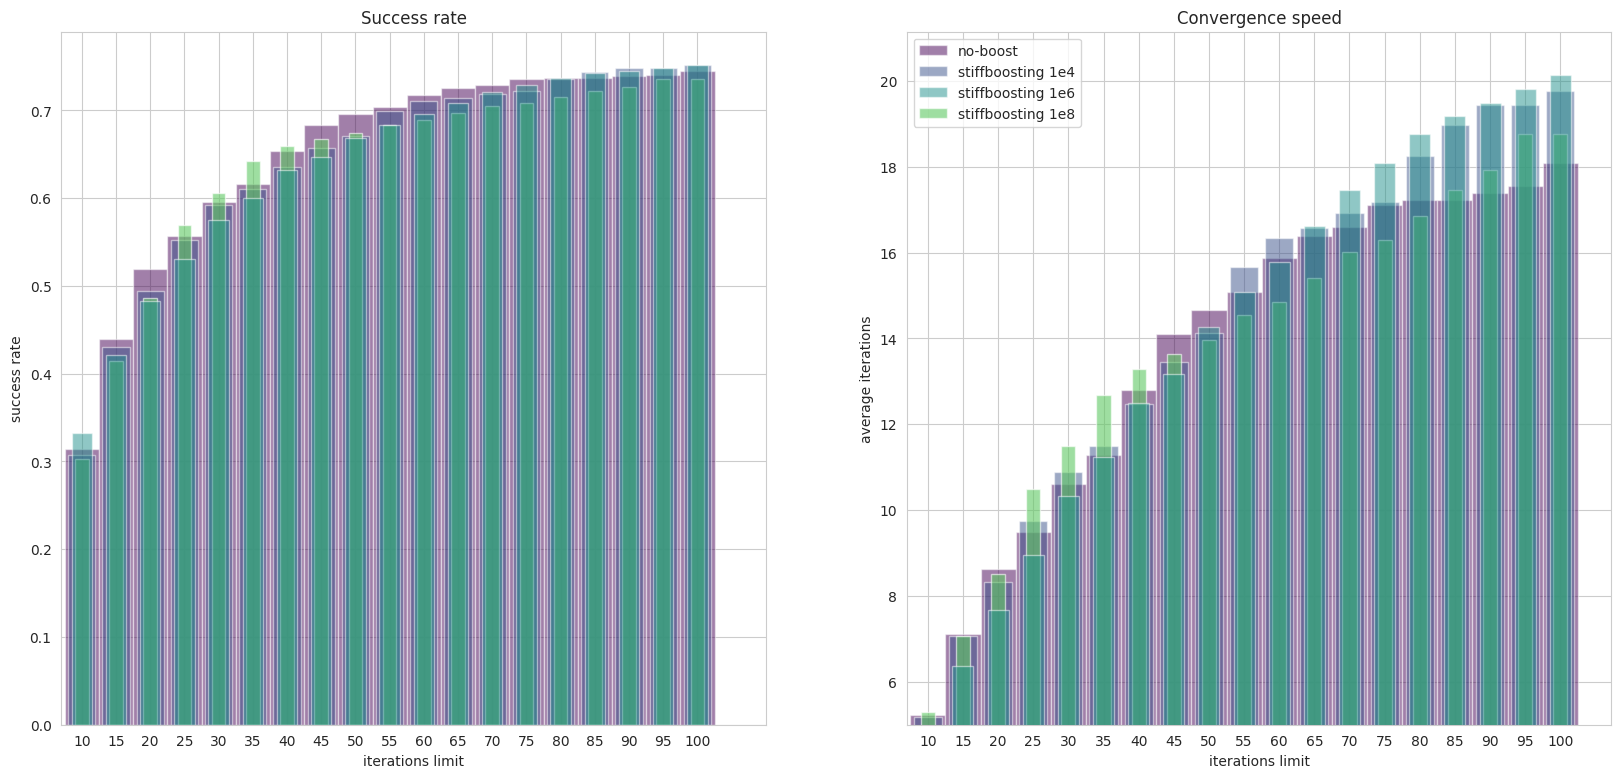

In [161]:

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig = plt.figure(figsize = (20, 9))

iterax = fig.add_subplot(122)
sucax = fig.add_subplot(121)
colors = [plt.cm.viridis(i) for i in range(0, 256, 64)]

alphas = [0.5, 0.5, 0.5, 0.6]

for i in range(len(Config['boosters'])):
    
    if (Config['boosters'][i] == 'stiffboosting 1e6'):
        iterax.bar(limits, height = average_iterations[Config['boosters'][i]], color = colors[i], width = 5-i, label = Config['boosters'][i], alpha = alphas[i], zorder = 5)
    
    else:
        iterax.bar(limits, height = average_iterations[Config['boosters'][i]], color = colors[i], width = 5-i, label = Config['boosters'][i], alpha = alphas[i])

# plt.bar(limits, height = average_iterations['no-boost'], color = 'red', width = 5, label = 'no-boost', alpha = 0.5)
# plt.bar(limits, height = average_iterations['stiffboosting 1e8'], color = 'orange', width = 4, label = r'stiff-boosting $\alpha = 1e8$', alpha = 0.5)
# plt.bar(limits, height = average_iterations['stiffboosting 1e6'], color = 'yellow', width = 2, label = r'stiff-boosting $\alpha = 1e6$', alpha = 0.5)
# plt.bar(limits, height = average_iterations['stiffboosting 1e4'], color = 'green', width = 3, label = r'stiff-boosting $\alpha = 1e4$', alpha = 0.5)
iterax.set_ylim(ymin = 4)
iterax.set_xticks(limits)

iterax.set_title('Convergence speed')
iterax.set_ylabel('average iterations')
iterax.set_xlabel('iterations limit')
iterax.set_xlim(xmin = 7)
iterax.set_ylim(ymin = 5)


colors = [plt.cm.viridis(i) for i in range(0, 256, 64)]

alphas = [0.5, 0.5, 0.5, 0.6]

for i in range(len(Config['boosters'])):
    
    if (Config['boosters'][i] == 'stiffboosting 1e6'):
        sucax.bar(limits, height = success_rates[Config['boosters'][i]], color = colors[i], width = 5-i, label = Config['boosters'][i], alpha = alphas[i], zorder = 5)
    
    else:
        sucax.bar(limits, height = success_rates[Config['boosters'][i]], color = colors[i], width = 5-i, label = Config['boosters'][i], alpha = alphas[i])

# plt.bar(limits, height = average_iterations['no-boost'], color = 'red', width = 5, label = 'no-boost', alpha = 0.5)
# plt.bar(limits, height = average_iterations['stiffboosting 1e8'], color = 'orange', width = 4, label = r'stiff-boosting $\alpha = 1e8$', alpha = 0.5)
# plt.bar(limits, height = average_iterations['stiffboosting 1e6'], color = 'yellow', width = 2, label = r'stiff-boosting $\alpha = 1e6$', alpha = 0.5)
# plt.bar(limits, height = average_iterations['stiffboosting 1e4'], color = 'green', width = 3, label = r'stiff-boosting $\alpha = 1e4$', alpha = 0.5)

sucax.set_xticks(limits)

sucax.set_title('Success rate')
sucax.set_ylabel('success rate')
sucax.set_xlabel('iterations limit')
sucax.set_xlim(xmin = 7, xmax = 110)

iterax.legend()



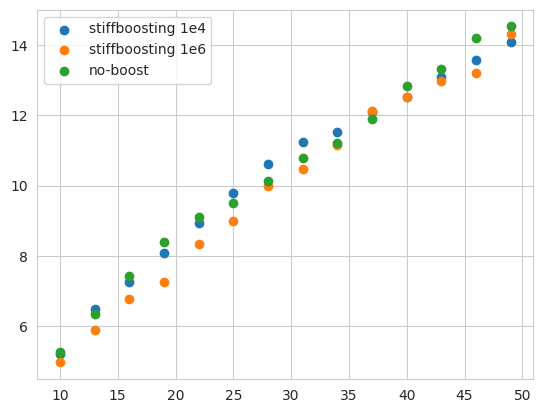

In [220]:
for booster in Config['boosters']: 

    plt.scatter(limits, average_iterations[booster], label = booster)
    #plt.errorbar(limits, average_iterations[booster], yerr = average_iterations_errs[booster])
plt.legend()

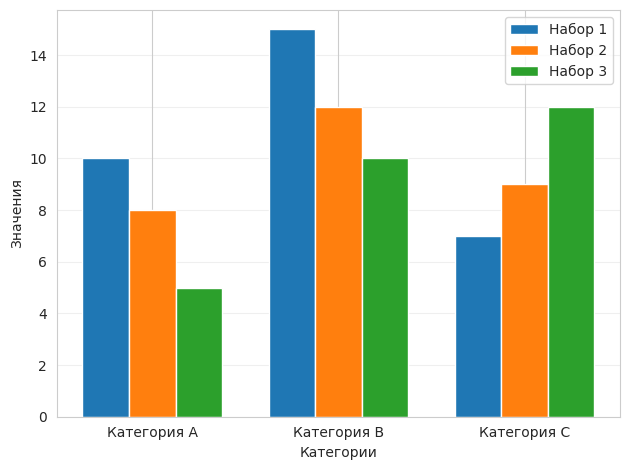

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Данные
categories = ['Категория A', 'Категория B', 'Категория C']
values1 = [10, 15, 7]  # Первый набор данных
values2 = [8, 12, 9]   # Второй набор данных
values3 = [5, 10, 12]  # Третий набор данных

# Параметры для группировки
n = len(categories)  # Количество категорий
m = 3  # Количество наборов данных (столбцов в группе)
width = 0.25  # Ширина одного столбца

# Создаем позиции для категорий
x = np.arange(n)

# Строим столбцы для каждого набора данных
plt.bar(x - width, values1, width, label='Набор 1')
plt.bar(x, values2, width, label='Набор 2')
plt.bar(x + width, values3, width, label='Набор 3')

# Настраиваем ось X
plt.xticks(x, categories)
plt.xlabel('Категории')

# Настраиваем ось Y
plt.ylabel('Значения')

# Добавляем легенду
plt.legend()

# Добавляем сетку для улучшения читаемости
plt.grid(axis='y', alpha=0.3)

# Автоматически регулируем отступы
plt.tight_layout()

plt.show()

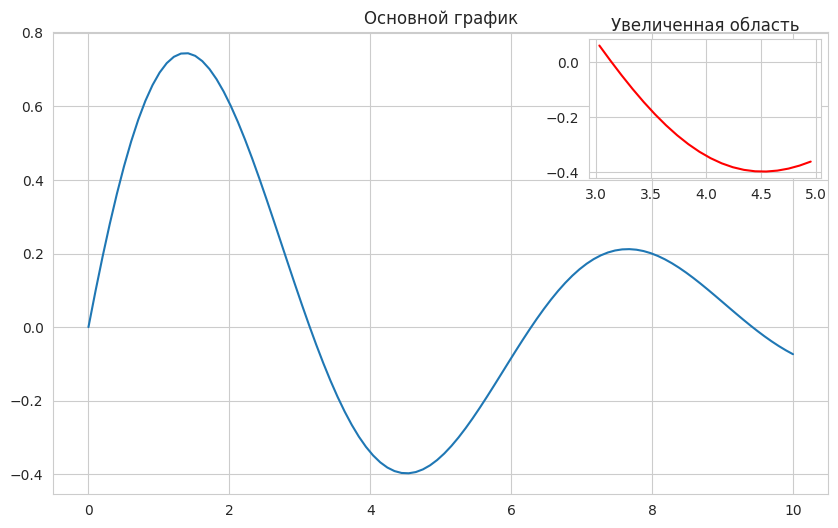

In [74]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Создаем основной график
fig, ax = plt.subplots(figsize=(10, 6))
x = np.linspace(0, 10, 100)
y = np.sin(x) * np.exp(-x/5)
ax.plot(x, y)
ax.set_title('Основной график')

# Создаем вставной подрисунок
ax_inset = inset_axes(ax, 
                      width="30%",   # ширина 30% от основного графика
                      height="30%",  # высота 30% от основного графика
                      loc='upper right')  # расположение в правом верхнем углу

# Рисуем на вставке увеличенную часть данных
x_inset = x[30:50]
y_inset = y[30:50]
ax_inset.plot(x_inset, y_inset, color='red')
ax_inset.set_title('Увеличенная область')

# Показать график
plt.show()